# Importing Modules

In [1]:
import pandas as pd # Data Processing
import numpy as np #Linear Algebra
import datetime # Converting date string to Pandas date object
import matplotlib.pyplot as plt

# Importing Datasets

In [2]:
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
items = pd.read_csv('items.csv')
items_category = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv', index_col=0)
submission = pd.read_csv('sample_submission.csv')

print('Data Loaded Successfully !!!')

Data Loaded Successfully !!!


In [3]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# View Missing Values

In [5]:
train.isnull().sum().sort_values(ascending=False).head()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
dtype: int64

In [6]:
test.isnull().sum().sort_values(ascending = False).head()

ID         0
shop_id    0
item_id    0
dtype: int64

Both the train and test datasets lack Null values

# EDA on the Dataset

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [8]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [9]:
train.shape

(2935849, 6)

In [10]:
test.shape

(214200, 3)

Prepare Date and Time

In [11]:
#train['date'] = pd.to_datetime(train['date'], format = '%d.%m.%Y')
#train['month'] = train['date'].dt.month
#train['year'] = train['date'].dt.year
# train = train.drop(['date'], ['item_price'], axis = 1)


In [12]:
#Defining a eda function
def basic_eda (df):
    print('__________TOP FIVE RECORDS__________')
    print(df.head(5))
    print('__________INFO__________')
    print(df.info())
    print("__________DESCRIBE__________")
    print(df.describe())
    print('__________COLUMNS__________')
    print(df.columns)
    print('__________DATA TYPES__________')
    print(df.dtypes)
    print('__________MISSING VALUES__________')
    print(df.isnull().sum().sort_values(ascending=False))
    print('__________NULL VALIUES__________')
    print(df.isna().sum().sort_values(ascending=False))
    print('__________SHAPE__________')
    print(df.shape)

In [13]:
#Calling the eda function on the train dataset
print('SALES DATA')
basic_eda(train)

SALES DATA
__________TOP FIVE RECORDS__________
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
__________INFO__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
__________DESCRIBE__________
       date_block_num       shop_id      

In [14]:
basic_eda(test)

__________TOP FIVE RECORDS__________
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
__________INFO__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None
__________DESCRIBE__________
                  ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.000000
25%     53549.750000      16.000000    5381.500000
50%    107099.500000      34.500000   11203.000000
75%    160649.250000      47.000000   16071.500000
max    214199.00000

In [15]:
basic_eda(shops)

__________TOP FIVE RECORDS__________
                                shop_id
shop_name                              
!Якутск Орджоникидзе, 56 фран         0
!Якутск ТЦ "Центральный" фран         1
Адыгея ТЦ "Мега"                      2
Балашиха ТРК "Октябрь-Киномир"        3
Волжский ТЦ "Волга Молл"              4
__________INFO__________
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, !Якутск Орджоникидзе, 56 фран to Ярославль ТЦ "Альтаир"
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   shop_id  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0+ bytes
None
__________DESCRIBE__________
         shop_id
count  60.000000
mean   29.500000
std    17.464249
min     0.000000
25%    14.750000
50%    29.500000
75%    44.250000
max    59.000000
__________COLUMNS__________
Index(['shop_id'], dtype='object')
__________DATA TYPES__________
shop_id    int64
dtype: object
__________MISSING VALUES__________
shop_id    0
d

In [16]:
basic_eda(items)

__________TOP FIVE RECORDS__________
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
__________INFO__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
__________DESCRIBE__

In [17]:
basic_eda(items_category)

__________TOP FIVE RECORDS__________
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
__________INFO__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
__________DESCRIBE__________
       item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.000000
__________COLUMNS__________
Index(['item_category_name', 'item_category_id

In [18]:
# pd.to_datetime converts string Date time into Python Date time object.
train['date'] = pd.to_datetime(train['date'], format = '%d.%m.%Y')

In [19]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


# Outliers

<AxesSubplot:xlabel='date'>

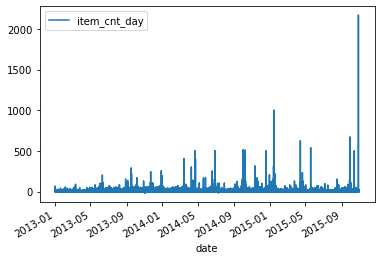

In [20]:
train_df1 = train[['date', 'item_cnt_day']]
train_df1.set_index('date', inplace=True)
train_df1.plot()

<AxesSubplot:xlabel='date'>

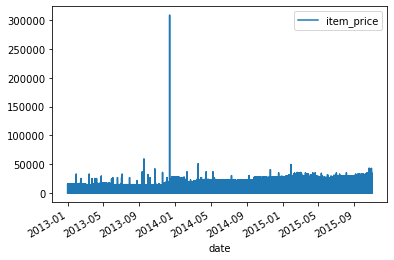

In [21]:
train_df2 = train[['date', 'item_price']]
train_df2.set_index('date', inplace=True)
train_df2.plot()

In [22]:
#Remove the outliers
train = train[train['item_price'] < 100000]
train = train[train['item_cnt_day'] < 1000]

<AxesSubplot:xlabel='date'>

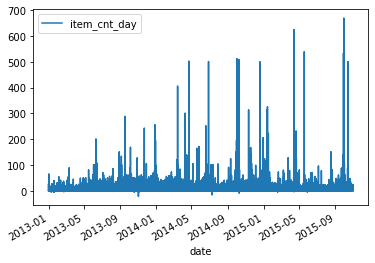

In [23]:
train_df3 = train[['date', 'item_cnt_day']]
train_df3.set_index('date', inplace=True)
train_df3.plot()

<AxesSubplot:xlabel='date'>

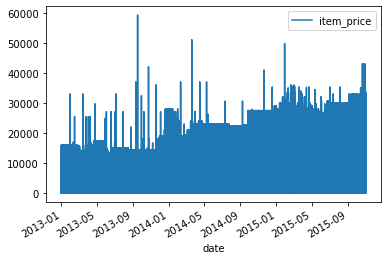

In [24]:
train_df4 = train[['date', 'item_price']]
train_df4.set_index('date', inplace=True)
train_df4.plot()

In [25]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [26]:
train['shop_id'].unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36])

In [27]:
train.item_id.unique()

array([22154,  2552,  2554, ...,  7610,  7635,  7640])

In [28]:
train.item_cnt_day.unique()

array([  1.,  -1.,   3.,   2.,   4.,   5.,  13.,   7.,   6.,   8.,  10.,
        11.,  30.,  22.,  14.,  15.,   9.,  12.,  17.,  19.,  20.,  -5.,
        -6.,  -3.,  -2.,  16.,  64.,  18.,  29.,  26.,  39.,  21.,  27.,
        53.,  25.,  23.,  24.,  40.,  28.,  31.,  36.,  -4.,  32.,  35.,
        41.,  88.,  44.,  52.,  56.,  38.,  34.,  57.,  69.,  37.,  47.,
        50.,  48.,  33.,  61.,  80.,  42.,  82., 200., 100.,  76.,  77.,
       107.,  46.,  49.,  70.,  55.,  60.,  45.,  71.,  65., 150.,  85.,
        89.,  43.,  58., 217., 104.,  84., 168.,  92., 156.,  68.,  62.,
       264., 110.,  83., 133.,  51., 148.,  54.,  67., 106., 109., 102.,
        90., 288., 171., 131.,  87.,  78., 151.,  59., 113., 118., 127.,
        97., 135., -22., 103., 111.,  96., 242., 105.,  72., 126.,  73.,
       101.,  91.,  63., 194., 255.,  98.,  81.,  75.,  74., 121., 405.,
        99., 300., 401., 502., 138., 134.,  66., 240., 130., 115., 164.,
       112., 501., 251., -16.,  93., 124., 149., 13

In [29]:
#train.set_index('date', inplace=True)

In [30]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [31]:
train_df = train[['date', 'item_price']]
train_df.head()

,date,item_price
0,2013-01-02,999.00
1,2013-01-03,899.00
2,2013-01-05,899.00
3,2013-01-06,1709.05
4,2013-01-15,1099.00


In [32]:
train_df.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

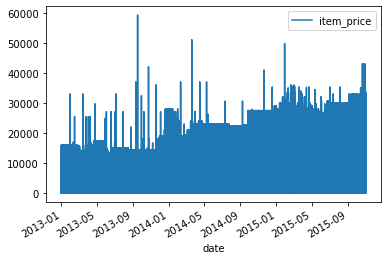

In [33]:
train_df.plot(kind='line')

In [34]:
train.shape

(2935846, 6)

In [35]:
test.shape

(214200, 3)

In [36]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [37]:
#Pivot the table to get the total count value of an item over the whole month for a shop. 
#Make the shop_id and item_id our indices and date_block_num our column.
# the value we want is item_cnt_day and used sum as aggregating function 
data = train.pivot_table(index = ['shop_id', 'item_id'], values = ['item_cnt_day'], columns=['date_block_num'], 
                         fill_value = 0, aggfunc = 'sum')

#Multi index pivot is used for shop_id and item_id
#aggfunc is an aggregate function that pivot_table applies to your grouped data.
#value parameter is where you tell the function which features to aggregate on. 
#columns parameter is optional and displays the values horizontally.

In [38]:
data.head()

item_cnt_day                              ...                 \
date_block_num            0   1  2  3  4  5  6  7  8  9   ... 24 25 26 27 28   
shop_id item_id                                           ...                  
0       30                 0  31  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        31                 0  11  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        32                 6  10  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        33                 3   3  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        35                 1  14  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   

                                
date_block_num  29 30 31 32 33  
shop_id item_id                 
0       30       0  0  0  0  0  
        31       0  0  0  0  0  
        32       0  0  0  0  0  
        33       0  0  0  0  0  
        35       0  0  0  0  0  

[5 rows x 34 columns]

In [39]:
#Reset the indices to be able to manipulate the data easily
data.reset_index(inplace=True)

In [40]:
data.head()

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [41]:
train.shop_id.max()

59

In [42]:
train.item_id.max()

22169

In [43]:
train.item_id.min()

0

In [44]:
dataset = pd.merge(test, data, on=['item_id', 'shop_id'], how='left')

/Users/georgreen/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/georgreen/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [45]:
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#Fill NaNs with 0
dataset.fillna(0, inplace=True)
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
dataset.shape

(214200, 37)

In [48]:
dataset.drop(['shop_id', 'item_id', 'ID'], inplace=True, axis=1)

In [49]:
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
# the last column is our label
y_train = dataset.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [51]:
# importing libraries required for our model
# LSTM is the Long Short-Term Memory layer
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [52]:
import tensorflow as tf

In [53]:
# our defining our model 
model_lstm = Sequential()
model_lstm.add(LSTM(units = 64,input_shape = (X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))

model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_lstm.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [55]:
history_lstm = model_lstm.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
214200/214200 [==============================] - 105s 491us/step - loss: 6.8845 - mean_squared_error: 6.8845
Epoch 2/10
214200/214200 [==============================] - 107s 498us/step - loss: 6.6388 - mean_squared_error: 6.6388
Epoch 3/10
214200/214200 [==============================] - 108s 504us/step - loss: 6.5200 - mean_squared_error: 6.5200
Epoch 4/10
214200/214200 [==============================] - 109s 508us/step - loss: 6.4250 - mean_squared_error: 6.4250
Epoch 5/10
214200/214200 [==============================] - 114s 532us/step - loss: 6.3427 - mean_squared_error: 6.3427
Epoch 6/10
214200/214200 [==============================] - 112s 524us/step - loss: 6.3089 - mean_squared_error: 6.3089
Epoch 7/10
214200/214200 [==============================] - 113s 529us/step - loss: 6.2617 - mean_squared_error: 6.2617
Epoch 8/10
214200/214200 [==============================] - 116s 539us/step - loss: 6.2140 - mean_squared_error: 6.2140
Epoch 9/10
214200/214200 [==============

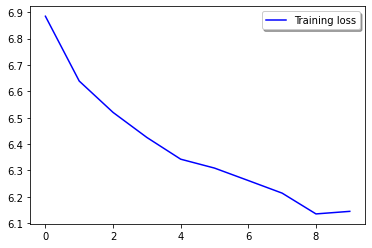

In [56]:
# Plot the loss curves for training
plt.plot(history_lstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [58]:
# creating submission file 
submission_pfs = model_lstm.predict(X_test)
# we will keep every value between 0 and 20
submission_pfs = submission_pfs.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test['ID'],'item_cnt_month':submission_pfs.ravel()})
# creating csv file from dataframe
submission.to_csv('sub_pfs.csv',index = False)

In [66]:
submission = pd.read_csv('sub_pfs.csv')
submission.head()

,ID,item_cnt_month
0,0,0.548353
1,1,0.129438
2,2,0.893373
3,3,0.188342
4,4,0.129438


In [67]:
submission.shape

(214200, 2)